In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf



In [2]:

start = '2012-01-01'
end = '2025-11-05'
stock='GOOG'
data = yf.download(stock, start, end)


C:\Users\shrut\AppData\Local\Temp\ipykernel_25444\60447307.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
data



Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.449755,16.517492,16.127389,16.141482,147611217
2012-01-04,16.520704,16.569406,16.331340,16.440361,114989399
2012-01-05,16.291536,16.414154,16.222811,16.368667,131808205
2012-01-06,16.069296,16.316013,16.063609,16.294999,108119746
2012-01-09,15.387978,15.994637,15.357570,15.982275,233776981
...,...,...,...,...,...
2025-10-29,274.990601,275.790067,268.254974,268.434850,26287900
2025-10-30,281.716187,291.739645,280.267150,291.529791,48570000


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.449755,16.517492,16.127389,16.141482,147611217
1,2012-01-04,16.520704,16.569406,16.331340,16.440361,114989399
2,2012-01-05,16.291536,16.414154,16.222811,16.368667,131808205
3,2012-01-06,16.069296,16.316013,16.063609,16.294999,108119746
4,2012-01-09,15.387978,15.994637,15.357570,15.982275,233776981
...,...,...,...,...,...,...
3476,2025-10-29,274.990601,275.790067,268.254974,268.434850,26287900
3477,2025-10-30,281.716187,291.739645,280.267150,291.529791,48570000
3478,2025-10-31,281.636261,286.098346,277.342066,283.020337,29932800


In [6]:
ma_100_days = data.Close.rolling(100).mean()

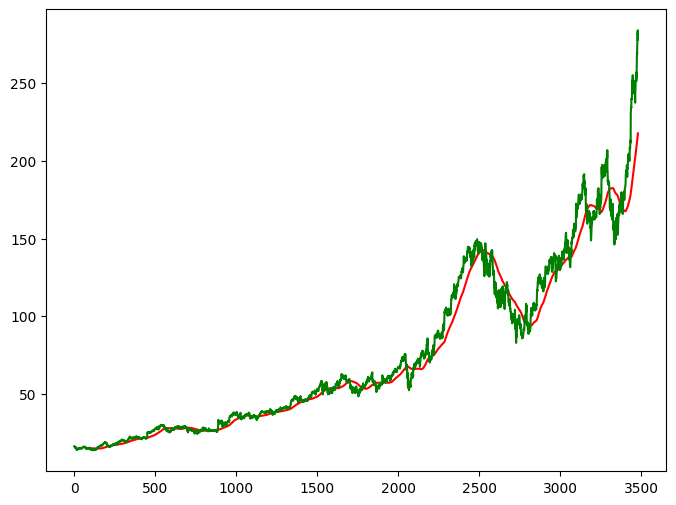

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

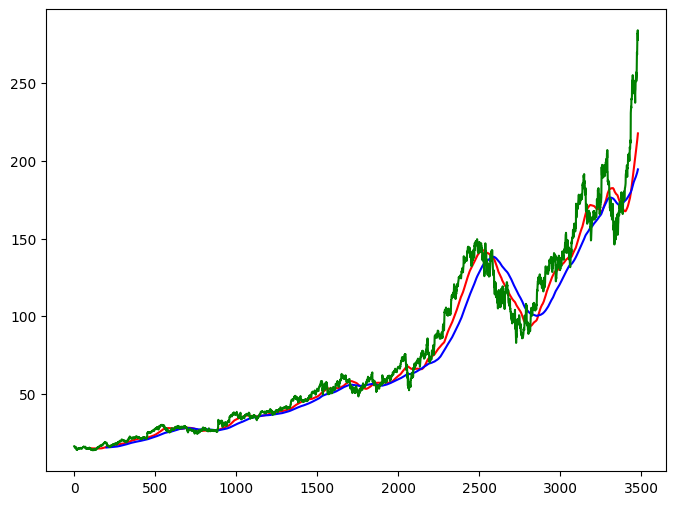

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)  #for removing null values

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]


2784

In [13]:
data_test.shape[0]

697

In [14]:
from sklearn.preprocessing import MinMaxScaler  #for scaling the data . MinMaxScaler is a data normalization technique in scikit-learn.
                                                 #It scales (transforms) your data so that all values fall within a specified range, usually [0, 1] """
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [17]:
x, y = np.array(x), np.array(y) #This line is preparing your training data (x,y) in the correct numerical format for the LSTM model

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential() #Creates a sequential model→ layers will be added one by one in order.
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))  #Randomly drops 20% of neurons to prevent overfitting.

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))  #prediction

C:\Users\shrut\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error') #Adam finds the best weights faster than plain gradient descent.or decides how to update weights.
                                                               #MSE -The model tries to minimize the average squared difference between predicted and real stock prices.

In [ ]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1) #Train this LSTM model on my stock price data, look back 100 days, predict the next day, repeat this 50 times, adjusting weights after every 32 samples, and show me the loss progress

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 31s 250ms/step - loss: 0.0260
Epoch 2/50


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days = data_train.tail(100)  #the last 100 rows of your training dataset.

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)  #test set includes 100 past days for the LSTM to start making predictions.

In [25]:
data_test_scale  =  scaler.fit_transform(data_test) #test data, converted into [0,1] range, so it matches what the model expects.

In [26]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step


In [28]:
scale =1/scaler.scale_  #the original data range (max-min). It’s used to reverse the scaling and recover predictions in real stock prices.

In [29]:
y_predict = y_predict*scale  #rescales the predicted values from the normalized range [0,1] back toward their real stock price scale.

In [30]:
y = y*scale  #converts the actual labels from the normalized range [0,1] back toward the real stock prices, so you can compare them fairly with predictions.

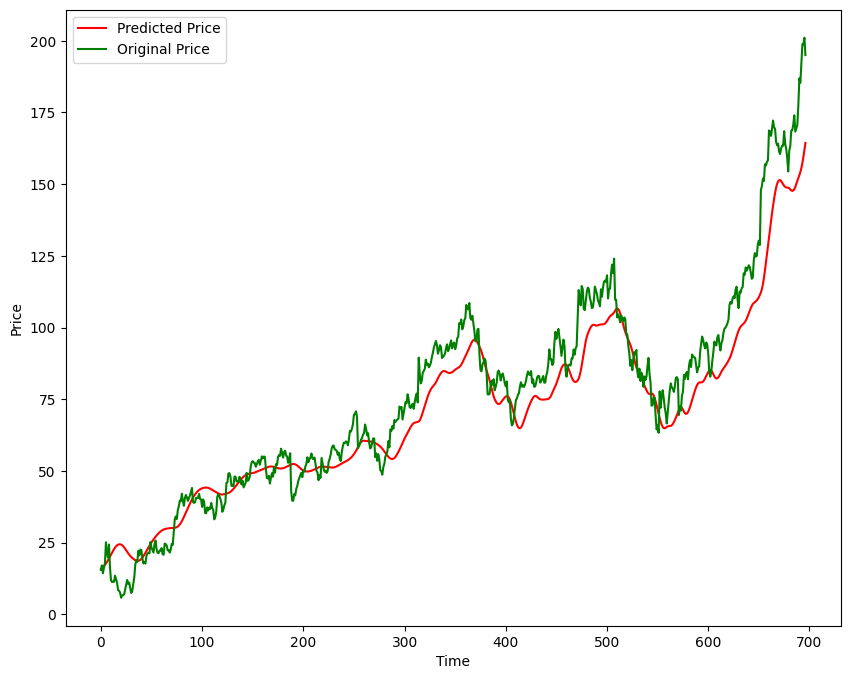

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()